In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

file_path = '/content/ABC Company.xlsx'
df = pd.read_excel(file_path)

# Display first 5 rows
df.head()


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0


In [6]:
np.random.seed(42)  # For reproducibility
df['height'] = np.random.randint(150, 181, size=len(df))

df.head()


,Name,Team,Number,Position,Age,Height,Weight,College,Salary,height
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0,156
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0,169
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN,178
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0,164
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0,160


In [7]:
np.random.seed(42)  # For reproducibility
df['height'] = np.random.randint(150, 181, size=len(df))

# Verify update
df.head()


,Name,Team,Number,Position,Age,Height,Weight,College,Salary,height
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0,156
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0,169
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN,178
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0,164
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0,160


In [9]:
# Strip spaces and convert all column names to lowercase
df.columns = df.columns.str.strip().str.lower()

# Now you can access the column safely
team_counts = df['team'].value_counts()
team_percentage = df['team'].value_counts(normalize=True) * 100

print("Employee count per team:\n", team_counts)
print("\nPercentage distribution per team:\n", team_percentage)


Employee count per team:
 team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
Milwaukee Bucks           16
New York Knicks           16
Boston Celtics            15
Los Angeles Clippers      15
Los Angeles Lakers        15
Phoenix Suns              15
Sacramento Kings          15
Brooklyn Nets             15
Philadelphia 76ers        15
Toronto Raptors           15
Golden State Warriors     15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Houston Rockets           15
San Antonio Spurs         15
Atlanta Hawks             15
Dallas Mavericks          15
Charlotte Hornets         15
Miami Heat                15
Denver Nuggets            15
Washington Wizards        15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

Percentage distribution per team:
 team
New Orleans Pelicans      4.1484

In [10]:
# ===============================
# 3b. Segregate Employees by Position
# ===============================
position_groups = df.groupby('position')

# Display counts per position
position_counts = df['position'].value_counts()
position_counts


,count
position,
SG,102
PF,100
PG,92
SF,85
C,79


In [11]:
# ===============================
# 3c. Predominant Age Group
# ===============================
bins = [20, 30, 40, 50, 60, 70]
labels = ['21-30', '31-40', '41-50', '51-60', '61-70']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

age_group_counts = df['age_group'].value_counts()
predominant_age_group = age_group_counts.idxmax()

print("Age group distribution:\n", age_group_counts)
print(f"\nPredominant age group: {predominant_age_group}")


Age group distribution:
 age_group
21-30    334
31-40    119
41-50      3
51-60      0
61-70      0
Name: count, dtype: int64

Predominant age group: 21-30


In [12]:
# ===============================
# 3d. Team and Position with Highest Salary Expenditure
# ===============================
salary_by_team = df.groupby('team')['salary'].sum().sort_values(ascending=False)
salary_by_position = df.groupby('position')['salary'].sum().sort_values(ascending=False)

highest_team = salary_by_team.idxmax()
highest_position = salary_by_position.idxmax()

print(f"Team with highest salary expenditure: {highest_team}")
print(f"Position with highest salary expenditure: {highest_position}")


Team with highest salary expenditure: Cleveland Cavaliers
Position with highest salary expenditure: C


In [13]:
# ===============================
# 3e. Correlation between Age and Salary
# ===============================
correlation = df['age'].corr(df['salary'])
print(f"Correlation between age and salary: {correlation:.2f}")


Correlation between age and salary: 0.21


/tmp/ipython-input-540352892.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='team', palette='Set2')


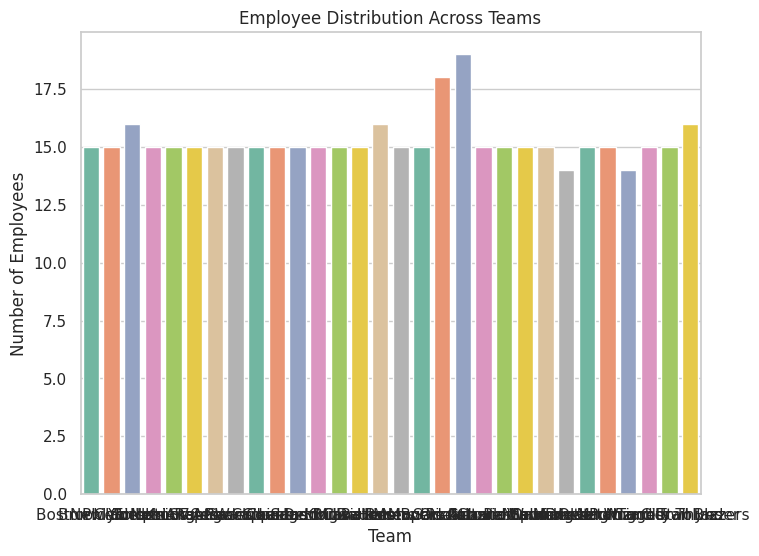

/tmp/ipython-input-540352892.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='position', palette='Set3')


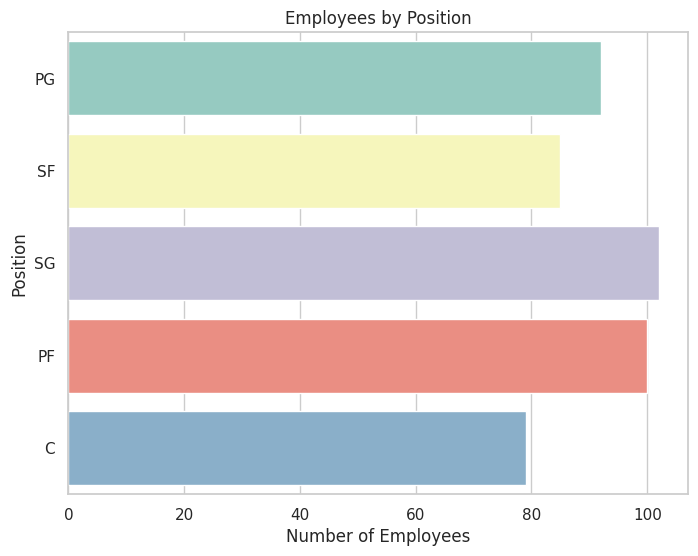

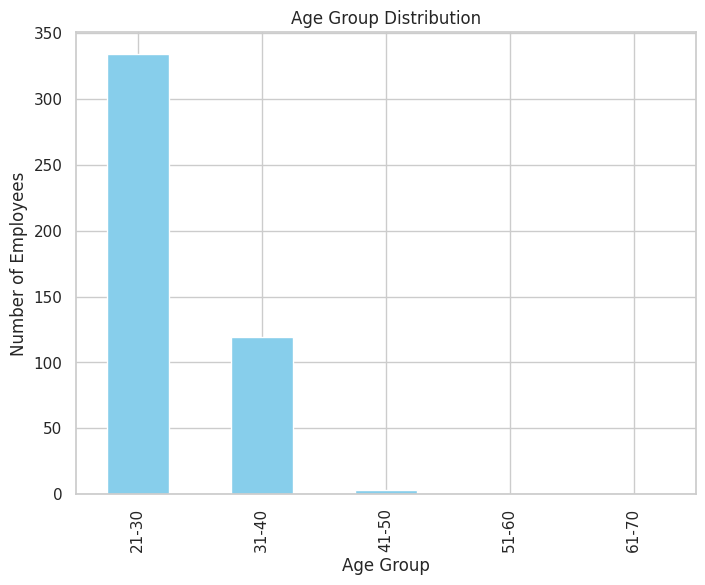

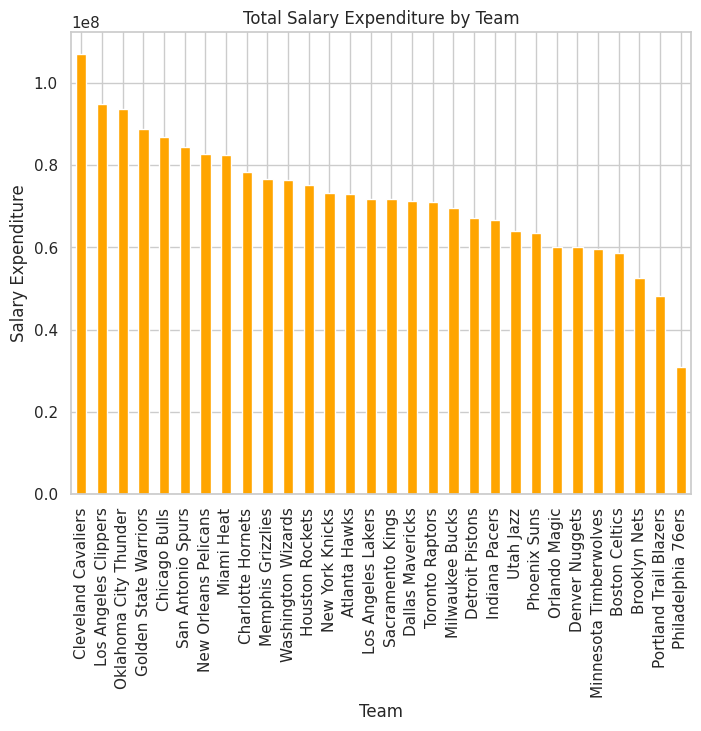

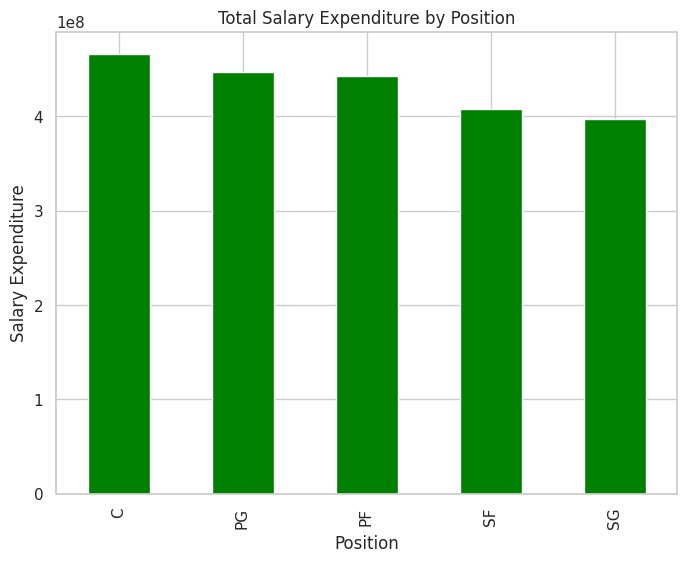

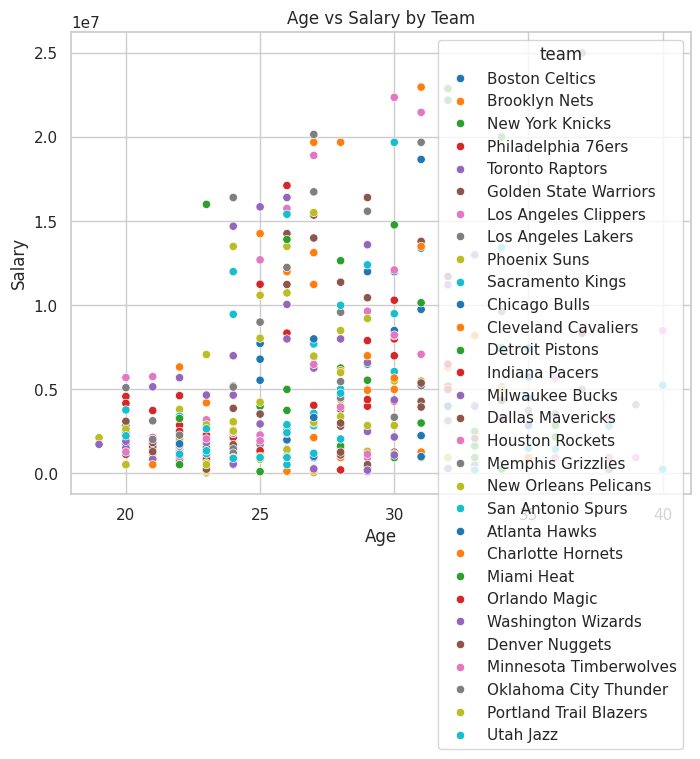

In [14]:
# ===============================
# 4. Graphical Representations
# ===============================

# a) Team distribution
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='team', palette='Set2')
plt.title('Employee Distribution Across Teams')
plt.xlabel('Team')
plt.ylabel('Number of Employees')
plt.show()

# b) Employees by position
plt.figure(figsize=(8,6))
sns.countplot(data=df, y='position', palette='Set3')
plt.title('Employees by Position')
plt.xlabel('Number of Employees')
plt.ylabel('Position')
plt.show()

# c) Age group distribution
plt.figure(figsize=(8,6))
age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.show()

# d) Salary expenditure by team
plt.figure(figsize=(8,6))
salary_by_team.plot(kind='bar', color='orange')
plt.title('Total Salary Expenditure by Team')
plt.xlabel('Team')
plt.ylabel('Salary Expenditure')
plt.show()

# Salary expenditure by position
plt.figure(figsize=(8,6))
salary_by_position.plot(kind='bar', color='green')
plt.title('Total Salary Expenditure by Position')
plt.xlabel('Position')
plt.ylabel('Salary Expenditure')
plt.show()

# e) Correlation: Age vs Salary
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='age', y='salary', hue='team', palette='tab10')
plt.title('Age vs Salary by Team')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()


In [15]:
# ===============================
# 5. Data Story / Insights
# ===============================
print("Key Insights from ABC Company Employee Data:\n")
print(f"1. Team Distribution: The largest team is {team_counts.idxmax()} with {team_counts.max()} employees.")
print(f"2. Position Distribution: The most common position is {position_counts.idxmax()}.")
print(f"3. Predominant Age Group: {predominant_age_group}, indicating a mid-career workforce.")
print(f"4. Highest Salary Expenditure: Team - {highest_team}, Position - {highest_position}.")
print(f"5. Age vs Salary Correlation: {correlation:.2f}, suggesting salary moderately increases with age/experience.")
print("\nVisualizations help management quickly identify workforce composition, salary allocation, and age distribution trends.")


Key Insights from ABC Company Employee Data:

1. Team Distribution: The largest team is New Orleans Pelicans with 19 employees.
2. Position Distribution: The most common position is SG.
3. Predominant Age Group: 21-30, indicating a mid-career workforce.
4. Highest Salary Expenditure: Team - Cleveland Cavaliers, Position - C.
5. Age vs Salary Correlation: 0.21, suggesting salary moderately increases with age/experience.

Visualizations help management quickly identify workforce composition, salary allocation, and age distribution trends.
